# Index Plot Gallery

Index plots are used for comparing different categories or segments against a baseline or average value, typically set at 100. They're ideal for retail analytics to identify which categories over- or underperform relative to the average.

Index plots excel at:
- **Performance Comparison**: Compare sales performance across product categories or regions against a baseline
- **Segment Analysis**: Analyze customer segments against overall average behavior  
- **Benchmarking**: Evaluate stores or regions relative to company-wide metrics
- **Opportunity Identification**: Highlight high-potential areas for growth or investment

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pyretailscience.plots import index

## Basic Index Plot

Create a basic index plot using default aggregation function (`agg_func="sum"`) and sorting by group.

---

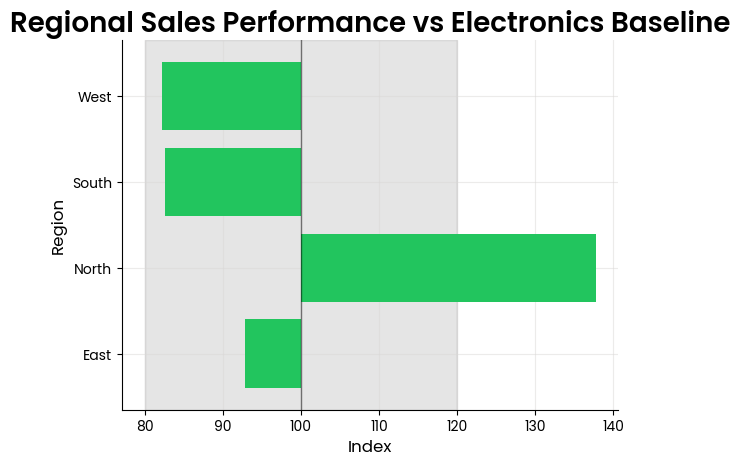

In [ ]:
# Create sample sales data across product categories and regions
rng = np.random.default_rng(42)
# fmt: off
sales_data = pd.DataFrame({
    "product_category": ["Electronics", "Apparel", "Home", "Sports", "Beauty"] * 20,
    "region": ["North", "South", "East", "West"] * 25,
    "sales_amount": rng.gamma(2, 1000, 100),
    "baseline_category": "Electronics",  # This will be our index baseline
})
# fmt: on

ax = index.plot(
    sales_data,
    value_col="sales_amount",
    group_col="region",
    index_col="product_category",
    value_to_index="Electronics",
    title="Regional Sales Performance vs Electronics Baseline",
    y_label="Region",
)
plt.show()

## Multiple Series Index Plot

Use the `series_col` parameter to create grouped index plots showing multiple time periods or segments.

---

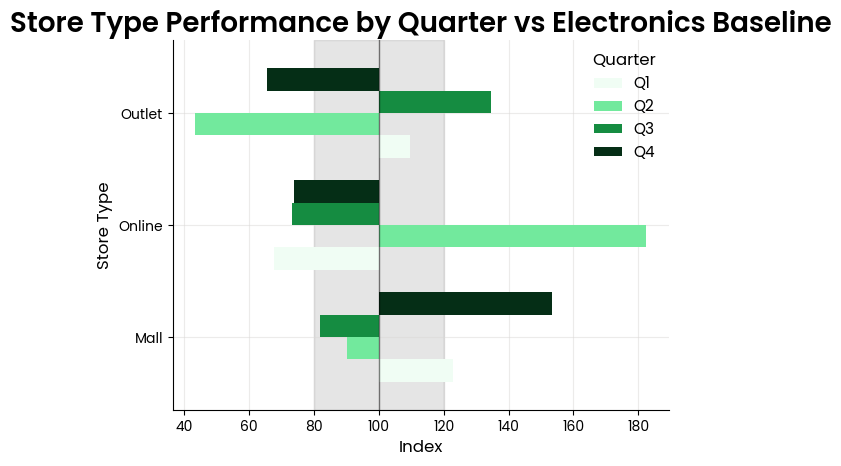

In [ ]:
# Create sample data with multiple quarters
rng = np.random.default_rng(42)
# fmt: off
quarterly_data = pd.DataFrame({
    "product_category": ["Electronics", "Apparel", "Home", "Sports", "Beauty"] * 12,
    "store_type": ["Mall", "Outlet", "Online"] * 20,
    "quarter": ["Q1", "Q2", "Q3", "Q4"] * 15,
    "revenue": rng.gamma(2.5, 800, 60),
})
# fmt: on

ax = index.plot(
    quarterly_data,
    value_col="revenue",
    group_col="store_type",
    index_col="product_category",
    value_to_index="Electronics",
    series_col="quarter",  # Creates grouped bars for each quarter
    title="Store Type Performance by Quarter vs Electronics Baseline",
    y_label="Store Type",
    legend_title="Quarter",
)
plt.show()

## Different Aggregation Function

Use `agg_func="mean"` instead of the default "sum" to show average performance rather than total performance.

---

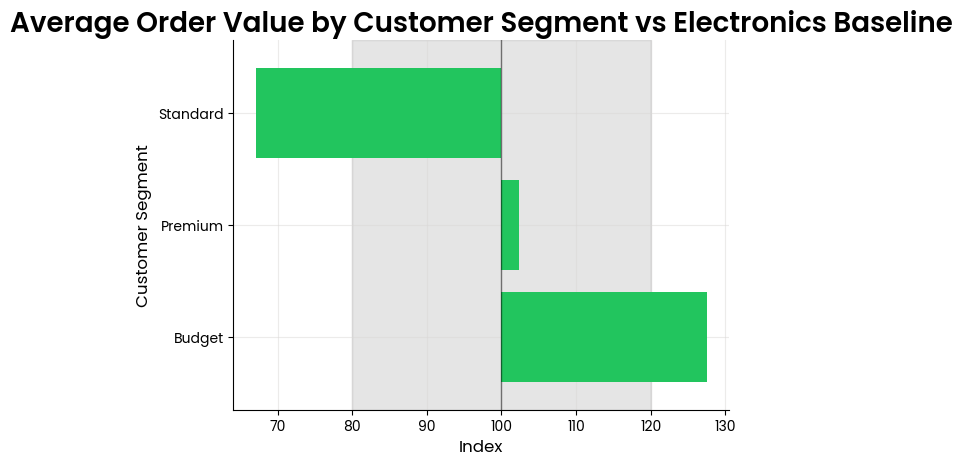

In [ ]:
# Create sample transaction data with multiple transactions per category
rng = np.random.default_rng(42)
# fmt: off
transaction_data = pd.DataFrame({
    "product_category": ["Electronics", "Apparel", "Home", "Sports", "Beauty"] * 30,
    "customer_segment": ["Premium", "Standard", "Budget"] * 50,
    "avg_order_value": rng.gamma(1.8, 120, 150),
})
# fmt: on

ax = index.plot(
    transaction_data,
    value_col="avg_order_value",
    group_col="customer_segment",
    index_col="product_category",
    value_to_index="Electronics",
    agg_func="mean",  # Use mean instead of sum
    title="Average Order Value by Customer Segment vs Electronics Baseline",
    y_label="Customer Segment",
)
plt.show()

## Value-Based Sorting

Use `sort_by="value"` to sort groups by their index values rather than alphabetically by group name.

---

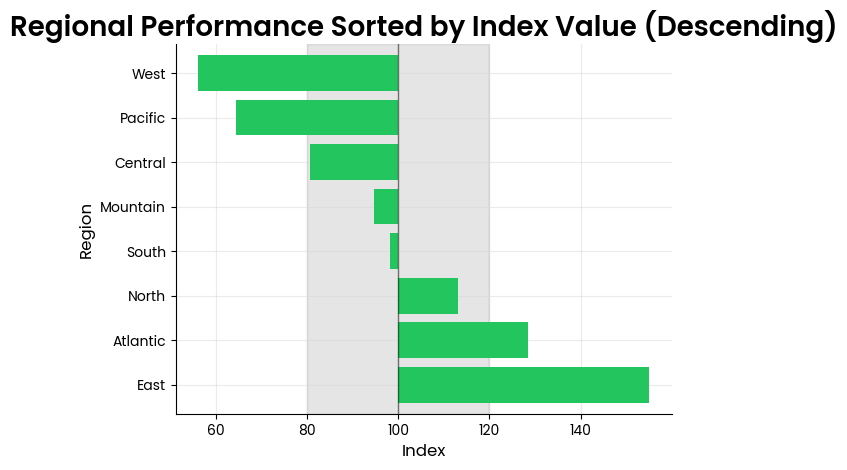

In [ ]:
# Create sample performance data across different regions
rng = np.random.default_rng(42)
# fmt: off
performance_data = pd.DataFrame({
    "product_category": ["Electronics", "Apparel", "Home", "Sports", "Beauty"] * 16,
    "region": ["North", "South", "East", "West", "Central", "Mountain", "Pacific", "Atlantic"] * 10,
    "performance_score": rng.gamma(2.2, 50, 80),
})
# fmt: on

ax = index.plot(
    performance_data,
    value_col="performance_score",
    group_col="region",
    index_col="product_category",
    value_to_index="Electronics",
    sort_by="value",  # Sort by index values instead of group names
    sort_order="descending",  # Show highest performers first
    title="Regional Performance Sorted by Index Value (Descending)",
    y_label="Region",
)
plt.show()

## Custom Highlight Range

Use custom `highlight_range` instead of the default (80, 120) to focus on different performance thresholds.

---

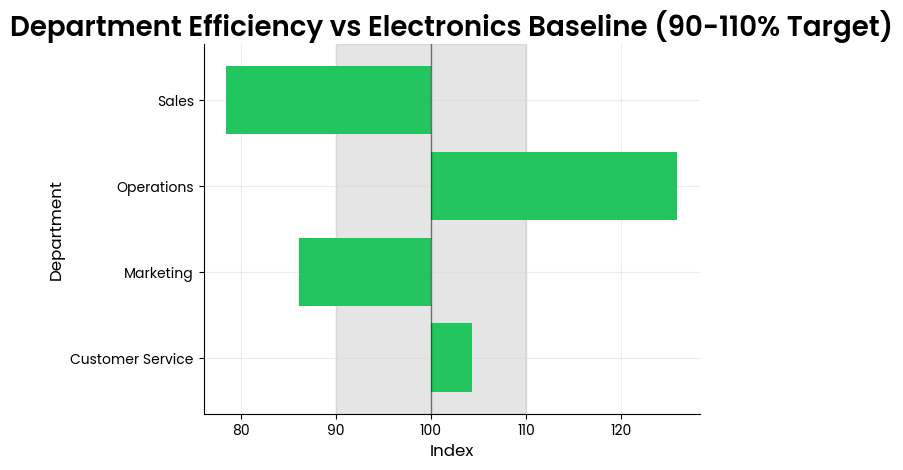

In [ ]:
# Create sample efficiency data
rng = np.random.default_rng(42)
# fmt: off
efficiency_data = pd.DataFrame({
    "product_category": ["Electronics", "Apparel", "Home", "Sports", "Beauty"] * 12,
    "department": ["Marketing", "Sales", "Operations", "Customer Service"] * 15,
    "efficiency_metric": rng.gamma(2.0, 85, 60),
})
# fmt: on

ax = index.plot(
    efficiency_data,
    value_col="efficiency_metric",
    group_col="department",
    index_col="product_category",
    value_to_index="Electronics",
    highlight_range=(90, 110),  # Tighter range for acceptable performance
    title="Department Efficiency vs Electronics Baseline (90-110% Target)",
    y_label="Department",
)
plt.show()

## Top N Filtering

Use `top_n` parameter to show only the top performing groups, useful for focusing on best performers.

---

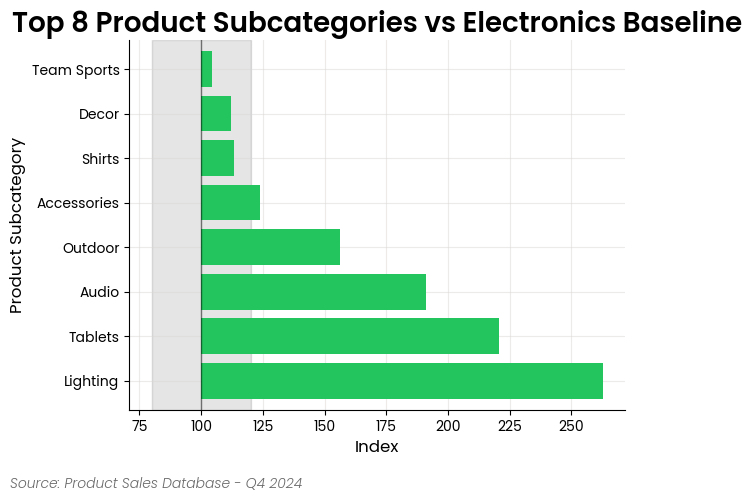

In [ ]:
# Create sample data with many product subcategories
rng = np.random.default_rng(42)
# fmt: off

# Create more subcategories to ensure we have enough for top_n=8
subcategories = [
    "Smartphones", "Laptops", "Tablets", "Audio", "Cameras", "Gaming",
    "Shirts", "Pants", "Shoes", "Accessories", "Outerwear", "Dresses",
    "Furniture", "Decor", "Kitchen", "Bedding", "Lighting", "Storage",
    "Running", "Gym", "Outdoor", "Team Sports", "Water Sports", "Fitness",
]

# Create balanced data across categories and subcategories
product_data = []
for i in range(120):
    category_idx = i % 5
    subcategory_idx = (i // 5) % len(subcategories)

    category = ["Electronics", "Apparel", "Home", "Sports", "Beauty"][category_idx]
    subcategory = subcategories[subcategory_idx]

    product_data.append({
        "product_category": category,
        "product_subcategory": subcategory,
        "sales_volume": rng.gamma(1.5, 200),
    })

product_data = pd.DataFrame(product_data)
# fmt: on

ax = index.plot(
    product_data,
    value_col="sales_volume",
    group_col="product_subcategory",
    index_col="product_category",
    value_to_index="Electronics",
    top_n=8,  # Show only top 8 performing subcategories
    title="Top 8 Product Subcategories vs Electronics Baseline",
    y_label="Product Subcategory",
    source_text="Source: Product Sales Database - Q4 2024",
)
plt.show()